In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import csv
import json
from datetime import datetime
#importing libraries

In [38]:
#January 2020 Data

In [39]:
#Import Stop and Search Data
df = pd.read_csv("2020-01-west-midlands-stop-and-search.csv")
df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-01-01T02:58:00+00:00,NaN,NaN,52.477214,-1.911043,NaN,18-24,Other ethnic group - Not stated,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
1,Person search,2020-01-01T03:16:00+00:00,NaN,NaN,52.477214,-1.911043,NaN,18-24,Black/African/Caribbean/Black British - Caribbean,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
2,Person search,2020-01-01T03:26:00+00:00,NaN,NaN,52.543890,-1.878513,NaN,NaN,Black/African/Caribbean/Black British - Any ot...,NaN,Firearms Act 1968 (section 47),Firearms,Arrest,False,False
3,Person search,2020-01-01T03:26:00+00:00,NaN,NaN,52.543890,-1.878513,NaN,NaN,White - English/Welsh/Scottish/Northern Irish/...,NaN,Firearms Act 1968 (section 47),Firearms,A no further action disposal,NaN,False
4,Person search,2020-01-01T03:26:00+00:00,NaN,NaN,52.543890,-1.878513,NaN,NaN,White - English/Welsh/Scottish/Northern Irish/...,NaN,Firearms Act 1968 (section 47),Firearms,A no further action disposal,NaN,False


In [3]:
df.Date

0       2020-01-01T02:58:00+00:00
1       2020-01-01T03:16:00+00:00
2       2020-01-01T03:26:00+00:00
3       2020-01-01T03:26:00+00:00
4       2020-01-01T03:26:00+00:00
                  ...            
2379    2020-01-31T21:37:00+00:00
2380    2020-01-31T21:59:00+00:00
2381    2020-01-31T22:00:00+00:00
2382    2020-01-31T22:01:00+00:00
2383    2020-01-31T22:09:00+00:00
Name: Date, Length: 2384, dtype: object

In [4]:
df.Outcome

0       A no further action disposal
1       A no further action disposal
2                             Arrest
3       A no further action disposal
4       A no further action disposal
                    ...             
2379    A no further action disposal
2380    A no further action disposal
2381    A no further action disposal
2382    A no further action disposal
2383    A no further action disposal
Name: Outcome, Length: 2384, dtype: object

In [21]:
search  = df["Date"].value_counts()
search

2020-12-15T02:10:00+00:00    5
2020-12-16T04:00:00+00:00    5
2020-12-20T16:11:00+00:00    5
2020-12-13T16:25:00+00:00    5
2020-12-05T05:06:00+00:00    5
                            ..
2020-12-10T13:01:00+00:00    1
2020-12-10T12:43:00+00:00    1
2020-12-10T11:41:00+00:00    1
2020-12-10T11:30:00+00:00    1
2020-12-31T23:58:00+00:00    1
Name: Date, Length: 1716, dtype: int64

In [22]:
search  = df["Outcome"].value_counts()
search

A no further action disposal       1427
Arrest                              287
Community resolution                107
Khat or Cannabis warning             41
Penalty Notice for Disorder          14
Summons / charged by post             6
Caution (simple or conditional)       4
Name: Outcome, dtype: int64

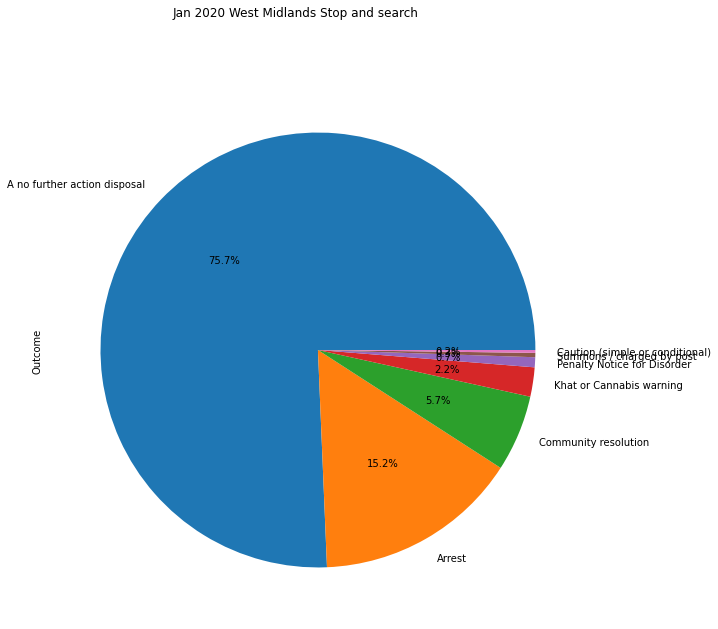

In [23]:
search.plot(kind='pie', figsize=(25,10), y= "Date", 
                         title = "Jan 2020 West Midlands Stop and search",
                         subplots=True, startangle=0, autopct="%1.1f%%")
search.plot

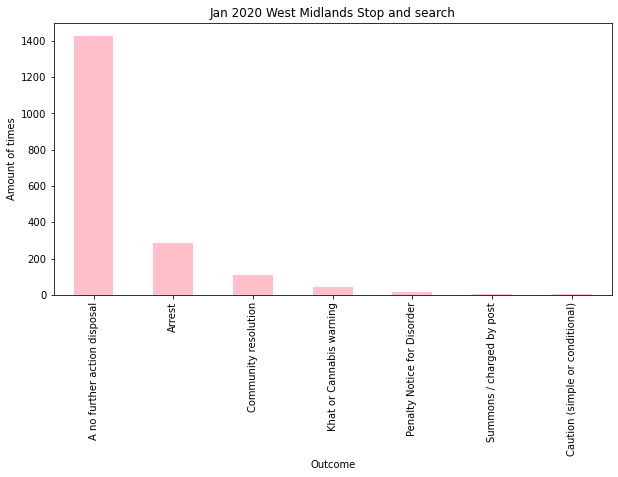

In [24]:
plot_outcome = search.plot.bar(figsize=(10,5) , color = 'pink')
plt.xlabel("Outcome")
plt.ylabel("Amount of times")
plt.title("Jan 2020 West Midlands Stop and search")
plt.show()

In [40]:
cr = pd.read_csv("2020-01-west-midlands-street.csv")
cr.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2020-01,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Anti-social behaviour,NaN,NaN
1,1b1d402a12d6d89a66b7b5b453300bf201cf43f79ff2d7...,2020-01,West Midlands Police,West Midlands Police,-1.839063,52.597809,On or near Byron Court,E01009418,Birmingham 001B,Criminal damage and arson,Investigation complete; no suspect identified,NaN
2,7e65a6f780e3e6dbb93d4e161ca9a5a6ef2498dd8168e5...,2020-01,West Midlands Police,West Midlands Police,-1.843740,52.594588,On or near Clarence Road,E01009418,Birmingham 001B,Other theft,Investigation complete; no suspect identified,NaN
3,376e737edfa06c918d07bcac79c4b3395dd33e169663a9...,2020-01,West Midlands Police,West Midlands Police,-1.840641,52.598270,On or near Badgers Bank Road,E01009418,Birmingham 001B,Public order,Unable to prosecute suspect,NaN
4,63ac41d45bbf2402bd1a8c1202ffd7554cae4de84d59b1...,2020-01,West Midlands Police,West Midlands Police,-1.841944,52.597265,On or near Chelsea Drive,E01009418,Birmingham 001B,Public order,Unable to prosecute suspect,NaN


In [41]:
search  = cr["Crime type"].value_counts()
search

Violence and sexual offences    9131
Vehicle crime                   3014
Burglary                        2328
Anti-social behaviour           2272
Criminal damage and arson       2160
Other theft                     1611
Public order                    1493
Shoplifting                     1297
Robbery                          698
Drugs                            526
Other crime                      457
Theft from the person            256
Possession of weapons            249
Bicycle theft                    151
Name: Crime type, dtype: int64

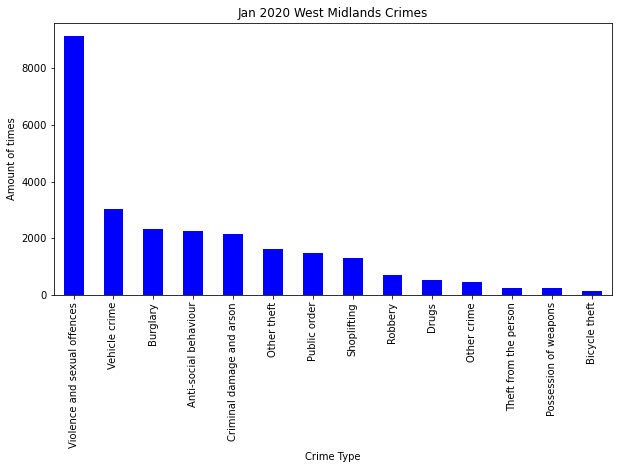

In [44]:
plot_outcome = search.plot.bar(figsize=(10,5) , color = 'blue')
plt.xlabel("Crime Type")
plt.ylabel("Amount of times")
plt.title("Jan 2020 West Midlands Crimes")
plt.show()

In [25]:
#Import June 2020 Stop and Search Data
df_jn = pd.read_csv("2020-06-west-midlands-stop-and-search.csv")
df_jn.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2020-05-31T23:42:00+00:00,NaN,NaN,52.410036,-1.502715,NaN,18-24,Mixed/Multiple ethnic groups - White and Black...,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False
1,Person and Vehicle search,2020-05-31T23:50:00+00:00,NaN,NaN,52.503550,-1.825603,NaN,18-24,Asian/Asian British - Pakistani,Asian,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,Khat or Cannabis warning,False,False
2,Person search,2020-06-01T00:38:00+00:00,NaN,NaN,52.600130,-2.091274,NaN,over 34,White - English/Welsh/Scottish/Northern Irish/...,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,A no further action disposal,NaN,False
3,Person search,2020-06-01T01:27:00+00:00,NaN,NaN,52.596918,-2.083768,NaN,25-34,Black/African/Caribbean/Black British - Caribbean,NaN,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,False
4,Person search,2020-06-01T02:03:00+00:00,NaN,NaN,52.505209,-1.941070,NaN,25-34,White - Any other White background,NaN,Police and Criminal Evidence Act 1984 (section 1),Offensive weapons,Arrest,NaN,False


In [26]:
df_jn.Date

0       2020-05-31T23:42:00+00:00
1       2020-05-31T23:50:00+00:00
2       2020-06-01T00:38:00+00:00
3       2020-06-01T01:27:00+00:00
4       2020-06-01T02:03:00+00:00
                  ...            
2157    2020-06-30T21:28:00+00:00
2158    2020-06-30T22:28:00+00:00
2159    2020-06-30T22:33:00+00:00
2160    2020-06-30T22:40:00+00:00
2161    2020-06-30T22:46:00+00:00
Name: Date, Length: 2162, dtype: object

In [27]:
df_jn.Outcome

0       A no further action disposal
1           Khat or Cannabis warning
2       A no further action disposal
3       A no further action disposal
4                             Arrest
                    ...             
2157                             NaN
2158    A no further action disposal
2159    A no further action disposal
2160                          Arrest
2161                          Arrest
Name: Outcome, Length: 2162, dtype: object

In [28]:
search  = df_jn["Outcome"].value_counts()
search

A no further action disposal       1564
Arrest                              289
Khat or Cannabis warning             77
Penalty Notice for Disorder          14
Community resolution                 13
Summons / charged by post            11
Caution (simple or conditional)       5
Name: Outcome, dtype: int64

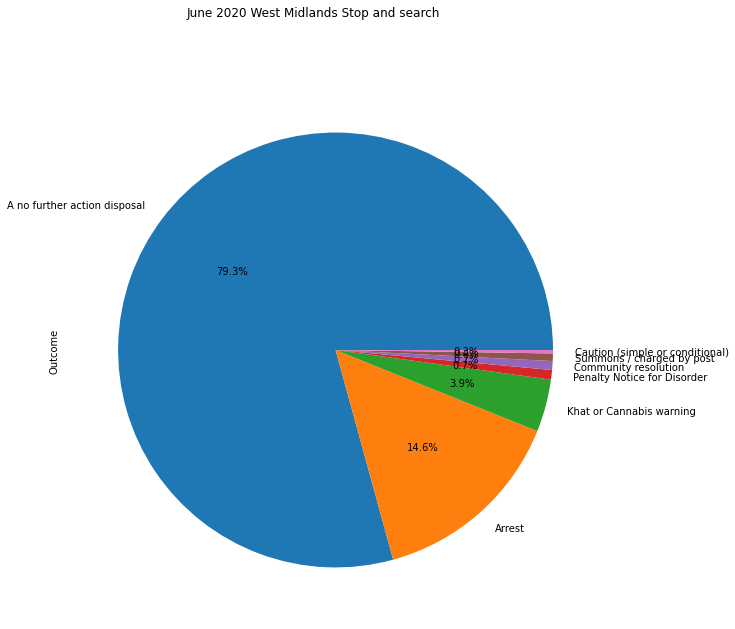

In [31]:
search.plot(kind='pie', figsize=(25,10), y= "Outcome", 
                         title = "June 2020 West Midlands Stop and search",
                         subplots=True, startangle=0, autopct="%1.1f%%")
search.plot

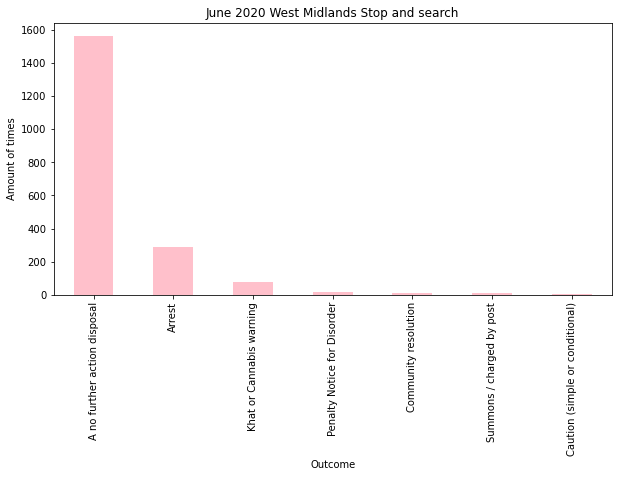

In [14]:
plot_outcome = search.plot.bar(figsize=(10,5) , color = 'pink')
plt.xlabel("Outcome")
plt.ylabel("Amount of times")
plt.title("June 2020 West Midlands Stop and search")
plt.show()

In [45]:
cr_jn = pd.read_csv("2020-06-west-midlands-street.csv")
cr_jn.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,cc1ce8dc799f230143e78236fee355177c20635d510ed8...,2020-06,West Midlands Police,West Midlands Police,-0.194469,51.614932,On or near Cissbury Ring South,E01000278,Barnet 020B,Violence and sexual offences,Unable to prosecute suspect,NaN
1,26538827fc2e7536a2cade6b955d9a865f260b3f679e53...,2020-06,West Midlands Police,West Midlands Police,-0.199065,51.600273,On or near Priory Close,E01000204,Barnet 025C,Public order,Investigation complete; no suspect identified,NaN
2,2fada0049f31052e85718b00fded5f45cea638de1321af...,2020-06,West Midlands Police,West Midlands Police,-0.199065,51.600273,On or near Priory Close,E01000204,Barnet 025C,Public order,Investigation complete; no suspect identified,NaN
3,70ae020a49b7766efefead85c703443b54438384b18981...,2020-06,West Midlands Police,West Midlands Police,-0.199065,51.600273,On or near Priory Close,E01000204,Barnet 025C,Violence and sexual offences,Investigation complete; no suspect identified,NaN
4,646c5bb572b8e9666d14c9eb7e4645f17448343ac7a8e6...,2020-06,West Midlands Police,West Midlands Police,-0.197534,51.564532,On or near Madoc Close,E01000140,Barnet 041C,Other theft,Investigation complete; no suspect identified,NaN


In [46]:
search  = cr_jn["Crime type"].value_counts()
search

Violence and sexual offences    10155
Anti-social behaviour            4592
Public order                     2168
Criminal damage and arson        1885
Vehicle crime                    1643
Burglary                         1342
Other theft                      1257
Shoplifting                       681
Robbery                           493
Drugs                             449
Other crime                       425
Possession of weapons             213
Bicycle theft                     177
Theft from the person              86
Name: Crime type, dtype: int64

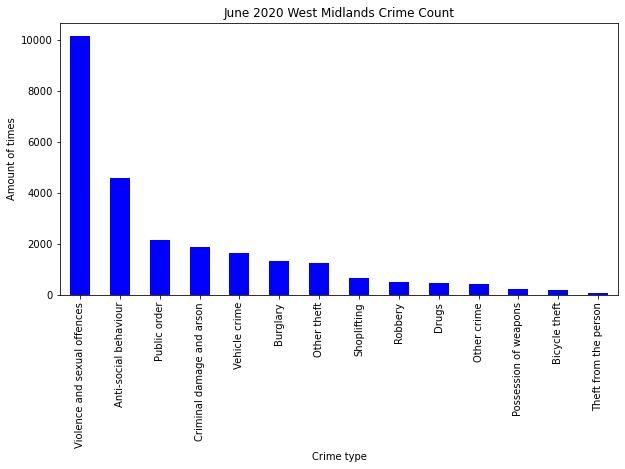

In [47]:
plot_outcome = search.plot.bar(figsize=(10,5) , color = 'blue')
plt.xlabel("Crime type")
plt.ylabel("Amount of times")
plt.title("June 2020 West Midlands Crime Count")
plt.show()

In [32]:
#Import December 2020 Stop and Search Data
df_dc = pd.read_csv("2020-12-west-midlands-stop-and-search.csv")
df_dc.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person search,2020-12-01T01:07:00+00:00,NaN,NaN,52.499769,-1.752097,NaN,over 34,White - English/Welsh/Scottish/Northern Irish/...,NaN,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,A no further action disposal,NaN,False
1,Person search,2020-12-01T01:10:00+00:00,NaN,NaN,52.499299,-2.066421,NaN,over 34,White - English/Welsh/Scottish/Northern Irish/...,NaN,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,False
2,Person search,2020-12-01T01:10:00+00:00,NaN,NaN,52.499299,-2.066421,NaN,over 34,White - English/Welsh/Scottish/Northern Irish/...,NaN,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,False
3,Person search,2020-12-01T01:10:00+00:00,NaN,NaN,52.499299,-2.066421,NaN,over 34,White - English/Welsh/Scottish/Northern Irish/...,NaN,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,False
4,Person search,2020-12-01T01:54:00+00:00,NaN,NaN,52.561599,-1.953327,NaN,over 34,White - English/Welsh/Scottish/Northern Irish/...,NaN,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,NaN,False


In [33]:
df_dc.Date

0       2020-12-01T01:07:00+00:00
1       2020-12-01T01:10:00+00:00
2       2020-12-01T01:10:00+00:00
3       2020-12-01T01:10:00+00:00
4       2020-12-01T01:54:00+00:00
                  ...            
2050    2020-12-31T20:39:00+00:00
2051    2020-12-31T23:20:00+00:00
2052    2020-12-31T23:44:00+00:00
2053    2020-12-31T23:45:00+00:00
2054    2020-12-31T23:58:00+00:00
Name: Date, Length: 2055, dtype: object

In [34]:
df_dc.Outcome

0       A no further action disposal
1                             Arrest
2                             Arrest
3                             Arrest
4       A no further action disposal
                    ...             
2050    A no further action disposal
2051            Community resolution
2052    A no further action disposal
2053    A no further action disposal
2054    A no further action disposal
Name: Outcome, Length: 2055, dtype: object

In [35]:
search  = df_dc["Outcome"].value_counts()
search

A no further action disposal       1427
Arrest                              287
Community resolution                107
Khat or Cannabis warning             41
Penalty Notice for Disorder          14
Summons / charged by post             6
Caution (simple or conditional)       4
Name: Outcome, dtype: int64

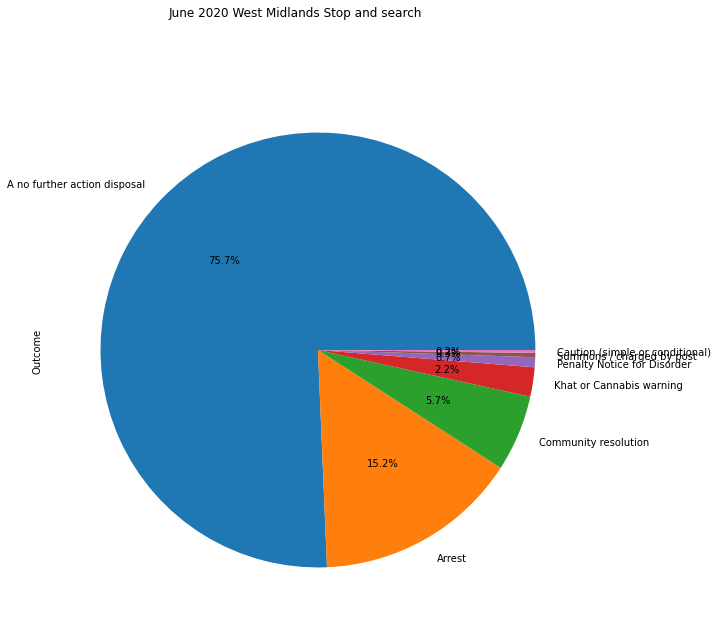

In [36]:
search.plot(kind='pie', figsize=(25,10), y= "Outcome", 
                         title = "June 2020 West Midlands Stop and search",
                         subplots=True, startangle=0, autopct="%1.1f%%")
search.plot

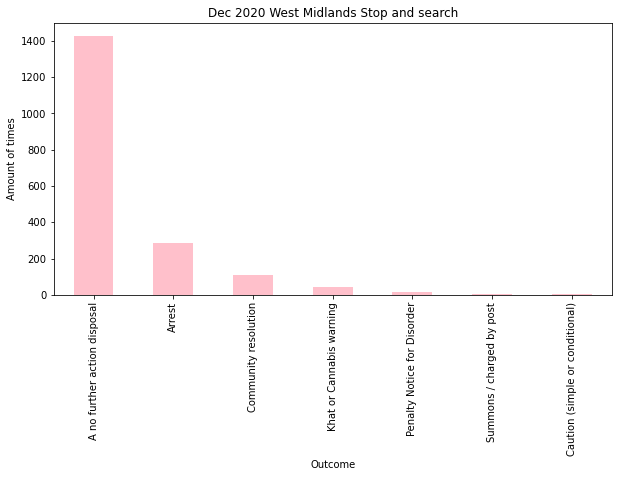

In [37]:
plot_outcome = search.plot.bar(figsize=(10,5) , color = 'pink')
plt.xlabel("Outcome")
plt.ylabel("Amount of times")
plt.title("Dec 2020 West Midlands Stop and search")
plt.show()

In [48]:
cr_dc = pd.read_csv("2020-12-west-midlands-street.csv")
cr_dc.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,ad4296b931509ef34ab398ad6680b6cd5c834d3cdfbaeb...,2020-12,West Midlands Police,West Midlands Police,-0.198102,51.629708,On or near The Close,E01000279,Barnet 007C,Other theft,Unable to prosecute suspect,NaN
1,e066ddcb12f31b29bab832e86179a7e7c85312343d20cd...,2020-12,West Midlands Police,West Midlands Police,-0.198152,51.615663,On or near Offham Slope,E01000278,Barnet 020B,Robbery,Status update unavailable,NaN
2,ff90cc64ec30ae8850869480371729d6c890ff0f4ec0ef...,2020-12,West Midlands Police,West Midlands Police,-0.202670,51.570024,On or near Basing Hill,E01000135,Barnet 038A,Other theft,Status update unavailable,NaN
3,91081c649f21f2f0b293b637e093a529ea2d2fddd9dd0e...,2020-12,West Midlands Police,West Midlands Police,-0.202670,51.570024,On or near Basing Hill,E01000135,Barnet 038A,Other theft,Status update unavailable,NaN
4,cbc42e308e574637d340417a967bd4a357a0200b8be135...,2020-12,West Midlands Police,West Midlands Police,-1.850056,52.591108,On or near Walsall Road,E01009417,Birmingham 001A,Burglary,Status update unavailable,NaN


In [49]:
search  = cr_dc["Crime type"].value_counts()
search

Violence and sexual offences    12650
Anti-social behaviour            3982
Public order                     2385
Vehicle crime                    2257
Criminal damage and arson        2132
Burglary                         1708
Other theft                      1392
Shoplifting                       982
Robbery                           615
Other crime                       578
Drugs                             543
Possession of weapons             362
Theft from the person             217
Bicycle theft                     147
Name: Crime type, dtype: int64

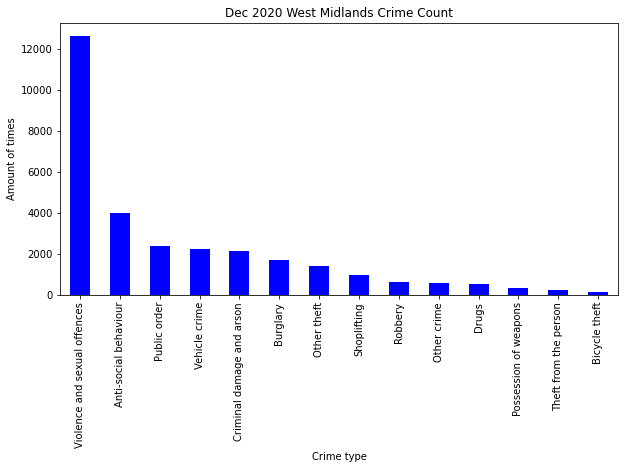

In [50]:
plot_outcome = search.plot.bar(figsize=(10,5) , color = 'blue')
plt.xlabel("Crime type")
plt.ylabel("Amount of times")
plt.title("Dec 2020 West Midlands Crime Count")
plt.show()